In [9]:
# Package imports
import numpy as np;                                  # "Scientific computing"
import scipy.stats as stats;                         # Statistical tests

import pandas as pd;                                 # Dataframe
import matplotlib.pyplot as plt;                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic;  # Mosaic plot
import seaborn as sns;                               # Advanced dataviz

- Independant variable = X
- Dependant variable = Y

In [10]:
penguins = sns.load_dataset('penguins') # Load the Palmer Penguins demo dataset
penguins.head()
male_chinstrap = penguins[(penguins['species'] == 'Chinstrap') & (penguins['sex'] == 'Male')]
# male_chinstrap = male_chinstrap.groupby('flipper_length_mm')['body_mass_g'].mean().reset_index()

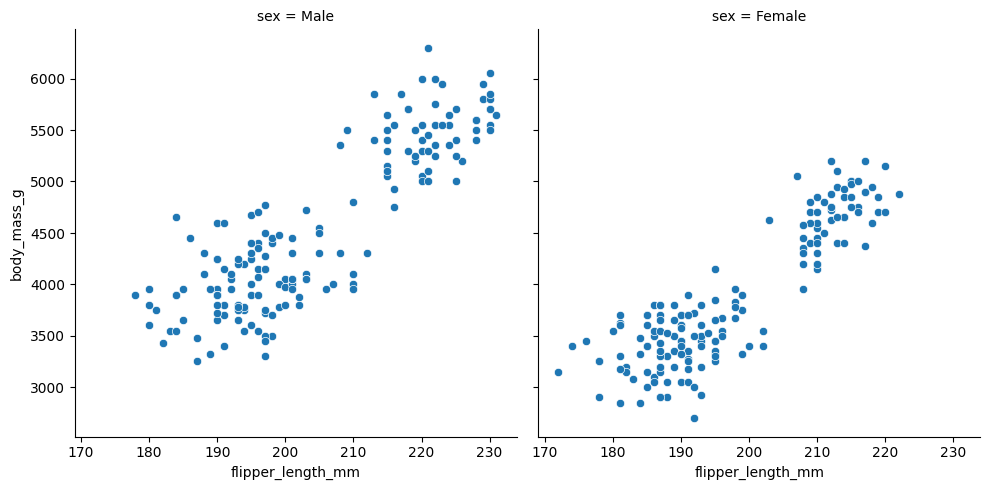

In [11]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g', col="sex", kind='scatter')

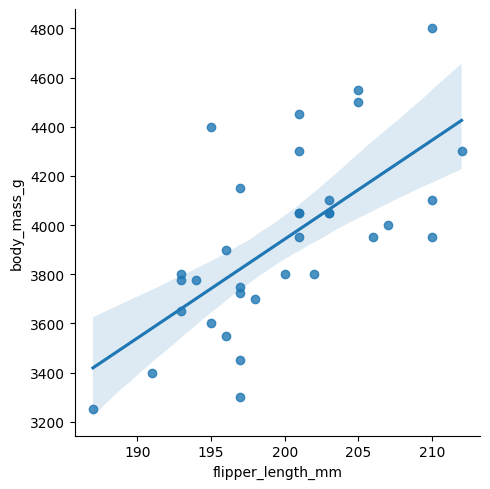

In [12]:
sns.lmplot(data=male_chinstrap, x='flipper_length_mm', y='body_mass_g');

## Covariance

**Covariance** is a measure that indicates whether a (linear) relationship
between two variables is increasing or decreasing.

In [13]:
np.cov(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g, ddof=1)#[0][1]

array([[3.57192513e+01, 1.43839127e+03],
       [1.43839127e+03, 1.31143605e+05]])

### Pearson's product-moment correlation coefficient

Correlation (or, specifically, Pearson's product-moment correlation coefficient) is defined as:

$$R = \frac{\mathrm{Cov}(X,Y)}{\sigma_x \sigma_y} = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum{(x_i-\overline{x})^2}} \sqrt{\sum{(y_i - \overline{y})^2}}}$$

𝑅 is a measure for
the strength of a linear correlation between 𝑥 and 𝑦.

- Always between -1 and +1
- closer it is to either of these two extremes, the closer the points in a scatterplot are to a straight line, either in the negative or positive direction.  
- if the correlation is close to 0, the scatterplot is typically a 'cloud'

| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |


In [14]:
# Correlation calculated from covariance
covar = np.cov(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g, ddof=1)[0][1] 

stdx = male_chinstrap.flipper_length_mm.std()
stdy = male_chinstrap.body_mass_g.std()

R1 = covar / (stdx * stdy)
print(f"R ≈ {covar:.3f} / ( {stdx:.3f} * {stdy:.3f} ) ≈ {R1:.3f}")

# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g)[0][1]
print(f"R ≈ {cor:.3f}")
print(R1 ** 2)

R ≈ 1438.391 / ( 5.977 * 362.138 ) ≈ 0.665
R ≈ 0.665
0.4416768211446927


### Coefficient of determination

In [15]:
cor ** 2

0.441676821144693

### In general

- $R^2$ is easier to interpret than $R$.
- The interpretation of $R^2$ as the square of a correlation helps to clarify the issue of when a correlation is "large".  
    - For example: how much better is R = 0.8 than R = 0.7 or R = 0.9? 
    - If the correlation between two variables Y and X is ±0.8, the regression of Y on X will have an $R^2$ of 0.64; that is, the regression with X as the
only explanatory variable will explain 64% of the variation in Y.
    - If the correlation drops to ±0.7, this percentage drops to 49%; 
    - If the correlation increases to ±0.9, the percentage increases to 81%. 
- The point is that before a single variable X can explain a large percentage of the variation in some other variable Y, the two variables must be highly correlated, in
either a positive or negative direction.

Another example: How much better is R = 0.7 than R = 0.5?  

- R² = 0.7 * 0.7 ~ 0.5 => 50% of the original variation in explained  
- R² = 0.5 * 0.5 = 0.25 => 25% of the original variation in explained  

With R², it is easy to see that the first correlation is twice as good as the second.


## Estemation of average:

In [38]:
a, b = np.polyfit(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g, 1)
x = 220 # flipper length X
print(a * x + b) # body mass, Y

a, b = np.polyfit(male_chinstrap.flipper_length_mm, male_chinstrap.body_mass_g, 1)
y = 3600 # body mass Y
print((y-b)/a) # predict flipper_length_mm, X

4747.910896524188
191.49418325458916


A scatter regression plot is a graphical representation that displays the relationship between two numerical variables. Here's how we can interpret it to answer the questions:

1. **Positive or Negative Relationship**:
   - A positive relationship is observed when an increase in one variable is associated with an increase in the other variable. In the scatter plot, this would be represented by points that tend to rise from left to right.
   - A negative relationship is observed when an increase in one variable is associated with a decrease in the other variable. In the scatter plot, this would be represented by points that tend to fall from left to right.

2. **Weak or Strong Relationship**:
   - A strong relationship is indicated when the points are closely clustered around a straight line, showing little scatter.
   - A weak relationship is indicated when the points are widely scattered around a straight line, showing more variability.

3. **Correlation Coefficient ($R$)**:
   - The correlation coefficient, \( R \), measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1.
     - \( R \) close to 1 indicates a strong positive relationship.
     - \( R \) close to -1 indicates a strong negative relationship.
     - \( R \) close to 0 indicates a weak or no linear relationship.

To answer the questions specifically:

1. **Deciding the Relationship (Positive/Negative)**:
   - If the points on the scatter plot trend upward from left to right, the relationship is positive.
   - If the points trend downward from left to right, the relationship is negative.

2. **Deciding the Strength (Weak/Strong)**:
   - If the points are tightly clustered around a line, the relationship is strong.
   - If the points are widely dispersed around a line, the relationship is weak.

3. **Deciding the Range of $R$**:
   - If the scatter plot shows a strong positive relationship, \( R \) would be in the range \([0.5, 1]\).
   - If the scatter plot shows a weak positive relationship, \( R \) would be in the range \([0, 0.5]\).
   - If the scatter plot shows a weak negative relationship, \( R \) would be in the range \([-0.5, 0]\).
   - If the scatter plot shows a strong negative relationship, \( R \) would be in the range \([-1, -0.5]\).

Let's illustrate this with an example scatter plot. Since I can't generate a plot here directly, imagine the following scenarios:

### Example 1: Positive Relationship

- **Plot Description**: The points are rising from left to right and are closely clustered around a line.
- **Relationship**: Positive.
- **Strength**: Strong.
- **Range of $R$**: \([0.5, 1]\).

### Example 2: Negative Relationship

- **Plot Description**: The points are falling from left to right and are closely clustered around a line.
- **Relationship**: Negative.
- **Strength**: Strong.
- **Range of $R$**: \([-1, -0.5]\).

### Example 3: Weak Positive Relationship

- **Plot Description**: The points are rising from left to right but are widely scattered around a line.
- **Relationship**: Positive.
- **Strength**: Weak.
- **Range of $R$**: \([0, 0.5]\).

### Example 4: Weak Negative Relationship

- **Plot Description**: The points are falling from left to right but are widely scattered around a line.
- **Relationship**: Negative.
- **Strength**: Weak.
- **Range of $R$**: \([-0.5, 0]\).

Based on these descriptions, you can decide the nature of the relationship and the range of the correlation coefficient \( R \) from a given scatter regression plot.